In [6]:
import pandas as pd
import numpy as np


In [7]:
year_dict = pd.read_excel('./data/2007-2021-PIT-Counts-by-CoC.xlsx', sheet_name=[0,1,2,3,4,5])
for i in year_dict.keys():
    year_dict[i] = year_dict[i].dropna()

In [8]:
# year_dict[0].loc[year_dict[0]['CoC Number'] == 'OH-500']
year_2021 = year_dict[0]
year_2021 = year_2021.dropna()
year_2021['State'] = year_2021['CoC Number'].astype(str).apply(lambda x: x[:2])
year_2021['County'] = year_2021['CoC Name'].astype(str).apply(lambda x: x)
year_2021.loc[year_2021['CoC Number'].str.contains("OH")]

,CoC Number,CoC Name,CoC Category,Type of Count,"Overall Homeless, 2021","Sheltered ES Homeless, 2021","Sheltered ES Homeless - Under 18, 2021","Sheltered ES Homeless - Age 18 to 24, 2021","Sheltered ES Homeless - Over 24, 2021","Sheltered ES Homeless - Female, 2021",...,"Sheltered Total Homeless Parenting Youth Under 18, 2021","Sheltered ES Homeless Parenting Youth Age 18-24, 2021","Sheltered TH Homeless Parenting Youth Age 18-24, 2021","Sheltered Total Homeless Parenting Youth Age 18-24, 2021","Unsheltered Homeless Parenting Youth Age 18-24, 2021","Sheltered ES Homeless Children of Parenting Youth, 2021","Sheltered TH Homeless Children of Parenting Youth, 2021","Sheltered Total Homeless Children of Parenting Youth, 2021",State,County
281,OH-500,Cincinnati/Hamilton County CoC,Largely Suburban CoC,Sheltered and full unsheltered,1016,777.0,178.0,50.0,549.0,322.0,...,0.0,13.0,4.0,17.0,0.0,17.0,5.0,22.0,OH,Cincinnati/Hamilton County CoC
282,OH-501,Toledo/Lucas County CoC,Other Largely Urban CoC,Sheltered-Only Count,383,337.0,74.0,15.0,248.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OH,Toledo/Lucas County CoC
283,OH-502,Cleveland/Cuyahoga County CoC,Largely Suburban CoC,Sheltered-Only Count,1557,1465.0,266.0,93.0,1106.0,502.0,...,0.0,12.0,2.0,14.0,0.0,17.0,2.0,19.0,OH,Cleveland/Cuyahoga County CoC
284,OH-503,Columbus/Franklin County CoC,Major City CoC,Sheltered-Only Count,1365,1210.0,255.0,67.0,888.0,443.0,...,0.0,20.0,25.0,45.0,0.0,31.0,35.0,66.0,OH,Columbus/Franklin County CoC
285,OH-504,Youngstown/Mahoning County CoC,Other Largely Urban CoC,Sheltered-Only Count,62,56.0,22.0,6.0,28.0,41.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,OH,Youngstown/Mahoning County CoC
286,OH-505,"Dayton, Kettering/Montgomery County CoC",Largely Suburban CoC,Sheltered-Only Count,568,463.0,53.0,24.0,386.0,195.0,...,0.0,0.0,6.0,6.0,0.0,0.0,7.0,7.0,OH,"Dayton, Kettering/Montgomery County CoC"
287,OH-506,"Akron, Barberton/Summit County CoC",Largely Suburban CoC,Sheltered and full unsheltered,394,158.0,42.0,9.0,107.0,88.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,OH,"Akron, Barberton/Summit County CoC"
288,OH-507,Ohio Balance of State CoC,Largely Rural CoC,Sheltered-Only Count,2336,1835.0,493.0,153.0,1189.0,856.0,...,0.0,30.0,14.0,44.0,0.0,43.0,15.0,58.0,OH,Ohio Balance of State CoC
289,OH-508,"Canton, Massillon, Alliance/Stark County CoC",Largely Suburban CoC,Sheltered and full unsheltered,234,168.0,50.0,12.0,106.0,91.0,...,0.0,7.0,0.0,7.0,0.0,9.0,0.0,9.0,OH,"Canton, Massillon, Alliance/Stark County CoC"


,0,1,2,3,4,5,6,7,8
0,OH-500,OH-501,OH-502,OH-503,OH-504,OH-505,OH-506,OH-507,OH-508
1,Cincinnati/Hamilton County CoC,Toledo/Lucas County CoC,Cleveland/Cuyahoga County CoC,Columbus/Franklin County CoC,Youngstown/Mahoning County CoC,"Dayton, Kettering/Montgomery County CoC","Akron, Barberton/Summit County CoC",Ohio Balance of State CoC,"Canton, Massillon, Alliance/Stark County CoC"
2,277.0,180.0,334.0,468.0,90.0,256.0,226.0,1148.0,194.0
3,290.0,204.0,349.0,477.0,95.0,203.0,119.0,1217.0,138.0
4,302.0,204.0,412.0,527.0,52.0,173.0,138.0,1127.0,105.0
5,297.0,183.0,390.0,545.0,34.0,180.0,105.0,1143.0,111.0
6,267.0,191.0,363.0,605.0,42.0,183.0,133.0,971.0,86.0
7,228.0,89.0,359.0,322.0,28.0,77.0,51.0,646.0,62.0


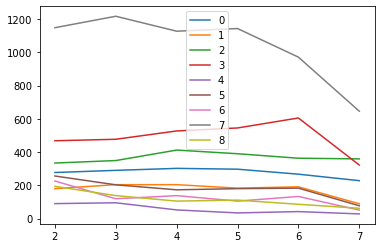

In [43]:
by_year = pd.DataFrame()
by_year['CoC Number'] = year_2021.loc[year_2021['CoC Number'].str.contains("OH")]['CoC Number']
by_year['CoC Name'] = year_2021.loc[year_2021['CoC Number'].str.contains("OH")]['CoC Name']
by_year = by_year.reset_index(drop = True)
by_year

by_year["Sheletered ES Homeless 2016"] = pd.DataFrame(year_dict[5].loc[year_dict[5]['CoC Number'].str.contains("OH")].iloc[:,3] + year_dict[5].loc[year_dict[5]['CoC Number'].str.contains("OH")].iloc[:,4]).reset_index(drop=True)
by_year["Sheletered ES Homeless 2017"] = pd.DataFrame(year_dict[4].loc[year_dict[4]['CoC Number'].str.contains("OH")].iloc[:,3] + year_dict[4].loc[year_dict[4]['CoC Number'].str.contains("OH")].iloc[:,4]).reset_index(drop=True)
by_year["Sheletered ES Homeless 2018"] = pd.DataFrame(year_dict[3].loc[year_dict[3]['CoC Number'].str.contains("OH")].iloc[:,3] + year_dict[3].loc[year_dict[3]['CoC Number'].str.contains("OH")].iloc[:,4]).reset_index(drop=True)
by_year["Sheletered ES Homeless 2019"] = pd.DataFrame(year_dict[2].loc[year_dict[2]['CoC Number'].str.contains("OH")].iloc[:,3] + year_dict[2].loc[year_dict[2]['CoC Number'].str.contains("OH")].iloc[:,4]).reset_index(drop=True)
by_year["Sheletered ES Homeless 2020"] = pd.DataFrame(year_dict[1].loc[year_dict[1]['CoC Number'].str.contains("OH")].iloc[:,3] + year_dict[1].loc[year_dict[1]['CoC Number'].str.contains("OH")].iloc[:,4]).reset_index(drop=True)

by_year["Sheletered ES Homeless 2021"] = pd.DataFrame(year_dict[0].loc[year_dict[0]['CoC Number'].str.contains("OH")].iloc[:,6] + year_dict[0].loc[year_dict[0]['CoC Number'].str.contains("OH")].iloc[:,7]).reset_index(drop=True)

by_year

# plt.plot(x = np.arange(2016, 2022), y = )
# by_year.T.reset_index(drop=True).iloc[2:].plot(label = list(by_year.T.reset_index(drop=True).iloc[1, :]))
by_year.T.reset_index(drop=True).iloc[2:].plot()
by_year.T.reset_index(drop=True)

In [33]:
list(by_year.T.reset_index(drop=True).iloc[1, :])

['Cincinnati/Hamilton County CoC',
 'Toledo/Lucas County CoC',
 'Cleveland/Cuyahoga County CoC',
 'Columbus/Franklin County CoC',
 'Youngstown/Mahoning County CoC',
 'Dayton, Kettering/Montgomery County CoC',
 'Akron, Barberton/Summit County CoC',
 'Ohio Balance of State CoC',
 'Canton, Massillon, Alliance/Stark County CoC']

In [10]:
# def per_year_homeless_pop(year):
#     homeless_pop = pd.read_excel(filename, sheet_name = str(year))
#     homeless_pop = homeless_pop.dropna()
#     oh_homeless_pop = homeless_pop.loc[]

SyntaxError: invalid syntax (<ipython-input-10-9b6729845140>, line 4)

In [23]:
year = year_dict[1]
year = year.dropna()
# year['State'] = year['CoC Number'].astype(str).apply(lambda x: x[:2])
# year_2020['County'] = year_2020['CoC Name'].astype(str).apply(lambda x: x)
year.loc[year['CoC Number'].str.contains("OH")]

,CoC Number,CoC Name,"Overall Homeless, 2020","Overall Homeless - Under 18, 2020","Overall Homeless - Age 18 to 24, 2020","Overall Homeless - Over 24, 2020","Overall Homeless - Female, 2020","Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020",...,"Overall Homeless Parenting Youth Age 18-24, 2020","Sheltered ES Homeless Parenting Youth Age 18-24, 2020","Sheltered TH Homeless Parenting Youth Age 18-24, 2020","Sheltered Total Homeless Parenting Youth Age 18-24, 2020","Unsheltered Homeless Parenting Youth Age 18-24, 2020","Overall Homeless Children of Parenting Youth, 2020","Sheltered ES Homeless Children of Parenting Youth, 2020","Sheltered TH Homeless Children of Parenting Youth, 2020","Sheltered Total Homeless Children of Parenting Youth, 2020","Unsheltered Homeless Children of Parenting Youth, 2020"
280,OH-500,Cincinnati/Hamilton County CoC,1092.0,174.0,93.0,825.0,342.0,747.0,3.0,0.0,...,9.0,6.0,3.0,9.0,0.0,13.0,8.0,5.0,13.0,0.0
281,OH-501,Toledo/Lucas County CoC,602.0,157.0,34.0,411.0,279.0,323.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0
282,OH-502,Cleveland/Cuyahoga County CoC,1675.0,244.0,119.0,1312.0,475.0,1184.0,16.0,0.0,...,14.0,13.0,1.0,14.0,0.0,17.0,16.0,1.0,17.0,0.0
283,OH-503,Columbus/Franklin County CoC,2036.0,431.0,174.0,1431.0,834.0,1194.0,8.0,0.0,...,26.0,22.0,4.0,26.0,0.0,38.0,32.0,6.0,38.0,0.0
284,OH-504,Youngstown/Mahoning County CoC,100.0,34.0,8.0,58.0,62.0,38.0,0.0,0.0,...,4.0,4.0,0.0,4.0,0.0,6.0,6.0,0.0,6.0,0.0
285,OH-505,"Dayton, Kettering/Montgomery County CoC",736.0,89.0,94.0,553.0,281.0,449.0,6.0,0.0,...,9.0,5.0,4.0,9.0,0.0,12.0,8.0,4.0,12.0,0.0
286,OH-506,"Akron, Barberton/Summit County CoC",587.0,96.0,37.0,454.0,264.0,323.0,0.0,0.0,...,3.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,0.0
287,OH-507,Ohio Balance of State CoC,3577.0,701.0,270.0,2606.0,1542.0,2023.0,10.0,2.0,...,43.0,30.0,12.0,42.0,1.0,55.0,35.0,17.0,52.0,3.0
288,OH-508,"Canton, Massillon, Alliance/Stark County CoC",250.0,73.0,13.0,164.0,131.0,119.0,0.0,0.0,...,4.0,2.0,2.0,4.0,0.0,9.0,4.0,5.0,9.0,0.0


In [12]:
year_dict[4].loc[year_dict[4]['CoC Number'].str.contains("OH")].iloc[:,2]

281    1162.0
282     499.0
283    1727.0
284    1691.0
285     262.0
286     619.0
287     507.0
288    3309.0
289     319.0
Name: Overall Homeless, 2017, dtype: float64

In [38]:
year_dict[1].loc[year_dict[1]['CoC Number'].str.contains("OH")].iloc[:,2]

280    1092.0
281     602.0
282    1675.0
283    2036.0
284     100.0
285     736.0
286     587.0
287    3577.0
288     250.0
Name: Overall Homeless, 2020, dtype: float64